In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#### accuracy check for different patch size. 

In [8]:
path_metrics_p256_unet = 'model/trained/patch_256/unet_metrics_1.csv'
path_metrics_p512_unet = 'model/trained/patch_512/unet_metrics_1.csv'
path_metrics_p768_unet = 'model/trained/patch_768/unet_metrics_1.csv'
path_metrics_p1024_unet = 'model/trained/patch_1024/unet_metrics_1.csv'
path_metrics_p1280_unet = 'model/trained/patch_1280/unet_metrics_1.csv'
metrics_p256_unet_df = pd.read_csv(path_metrics_p256_unet)
metrics_p512_unet_df = pd.read_csv(path_metrics_p512_unet)
metrics_p768_unet_df = pd.read_csv(path_metrics_p768_unet)
metrics_p1024_unet_df = pd.read_csv(path_metrics_p1024_unet)
metrics_p1280_unet_df = pd.read_csv(path_metrics_p1280_unet)
metrics_df = [metrics_p256_unet_df, metrics_p512_unet_df, 
                metrics_p768_unet_df, metrics_p1024_unet_df, 
                metrics_p1280_unet_df
                ]
# metrics_p256_unet_df.tail(10)
metrics_p512_unet_df.tail()
# metrics_p1024_unet_df.tail(5)


,tra_loss,tra_miou,tra_oa,val_loss,val_miou,val_oa
96,0.017057,0.897271,0.960716,0.021388,0.866514,0.929491
97,0.013557,0.940157,0.976651,0.020726,0.868328,0.921453
98,0.011645,0.949739,0.970996,0.023425,0.858525,0.913715
99,0.009000,0.948491,0.973277,0.021278,0.865935,0.924880
100,0.009360,0.943085,0.976181,0.021233,0.865793,0.925088


In [9]:
# path_metrics_p256_unet = 'model/trained/patch_256/unet_metrics_1.csv'
# path_metrics_p512_unet = 'model/trained/patch_512/unet_resize256_metrics.csv'
# path_metrics_p768_unet = 'model/trained/patch_768/unet_resize256_metrics.csv'
# path_metrics_p1024_unet = 'model/trained/patch_1024/unet_resize256_metrics.csv'
# path_metrics_p1280_unet = 'model/trained/patch_1280/unet_resize256_metrics.csv'
# metrics_p256_unet_df = pd.read_csv(path_metrics_p256_unet)
# metrics_p512_resize256_unet_df = pd.read_csv(path_metrics_p512_unet)
# metrics_p768_resize256_unet_df = pd.read_csv(path_metrics_p768_unet)
# metrics_p1024_resize256_unet_df = pd.read_csv(path_metrics_p1024_unet)
# metrics_p1280_resize256_unet_df = pd.read_csv(path_metrics_p1280_unet)
# metrics_resize256_df = [metrics_p256_unet_df, metrics_p512_resize256_unet_df, 
#                 metrics_p768_resize256_unet_df, metrics_p1024_resize256_unet_df, 
#                 metrics_p1280_resize256_unet_df
#                 ]
# metrics_p256_unet_df.tail(10)
# # metrics_p512_resize256_unet_df.tail()
# # metrics_p1024_resize256_unet_df.tail(20)


In [10]:
colors = sns.color_palette("hls", 6)
labels = ['unet_256', 
            'unet_512',
            'unet_768',
            'unet_1024',
            'unet_1280',
          ]


Text(0.5, 1.0, 'Resize to 256')

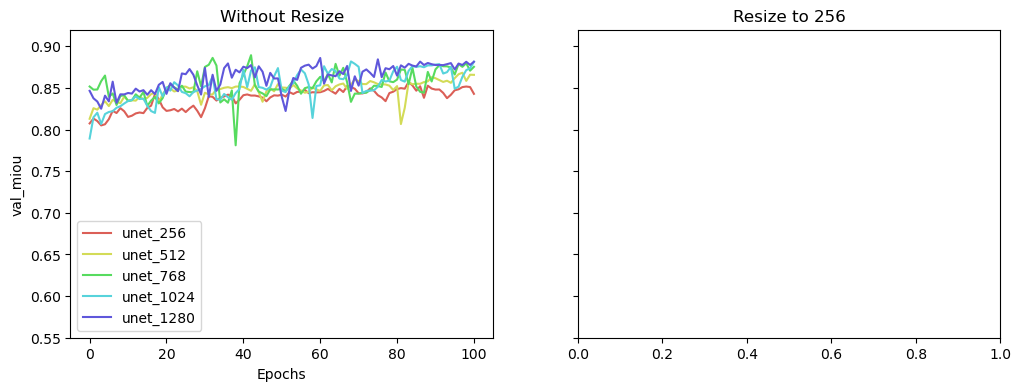

In [11]:
fig, ax = plt.subplots(1,2, figsize=(12, 4), sharey=True)
for i, metric_df in enumerate(metrics_df):
    sns.lineplot(data=metric_df, 
                x=metric_df.index, 
                y='val_miou', 
                label=labels[i],
                color=colors[i],
                ax=ax[0])
# for i, metric_df in enumerate(metrics_resize256_df):
#     sns.lineplot(data=metric_df, 
#                 x=metric_df.index, 
#                 y='val_miou', 
#                 label=labels[i],
#                 color=colors[i],
#                 ax=ax[1])
ax[0].set_xlabel('Epochs')
ax[0].set_ylim(0.55, 0.92) 
ax[0].set_title('Without Resize')
ax[1].set_title('Resize to 256') 


Text(0.5, 1.0, 'Resize to 256')

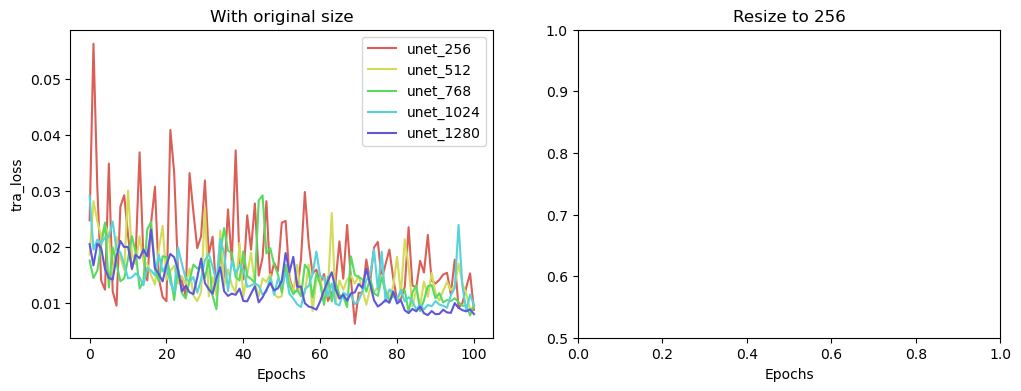

In [12]:
fig, ax = plt.subplots(1,2, figsize=(12, 4))
for i, metric_df in enumerate(metrics_df):
    sns.lineplot(data=metric_df, 
                x=metric_df.index, 
                y='tra_loss', 
                label=labels[i],
                color=colors[i],
                ax=ax[0])
# for i, metric_df in enumerate(metrics_resize256_df):
#     sns.lineplot(data=metric_df, 
#                 x=metric_df.index, 
#                 y='val_oa', 
#                 label=labels[i],
#                 color=colors[i],
#                 ax=ax[1])
ax[0].set_xlabel('Epochs')
# ax[0].set_ylim(0.5, 1)
ax[0].set_title('With original size')
ax[1].set_xlabel('Epochs')
ax[1].set_ylim(0.5, 1)
ax[1].set_title('Resize to 256') 
